In [ ]:
# 安装pandas
# pip install Pandas

# 运行测试套件
# 运行前需要安装: hypothesis和pytest
import pandas as pd 
# pd.test()

In [5]:
# 对象创建
# 传入一些值的列表来创建一个Series,pandas会自动创建一个默认的整数索引.
import pandas as pd 
import numpy as np 
import pprint

s = pd.Series([1,3,5,np.nan,6,8])
print(s)
print('-'*30)
# 传递带有日期时间索引和带标签列的NumPy数组来创建DataFrame
dates = pd.date_range('20190815',periods=6)
pprint.pprint(dates)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
------------------------------
DatetimeIndex(['2019-08-15', '2019-08-16', '2019-08-17', '2019-08-18',
               '2019-08-19', '2019-08-20'],
              dtype='datetime64[ns]', freq='D')


In [8]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
# df.to_excel('./output.xlsx')
pprint.pprint(df)

                   A         B         C         D
2019-08-15  0.390134  0.870386 -0.658386  0.574883
2019-08-16 -0.945408  1.624483 -1.708299 -1.583278
2019-08-17 -0.280608 -0.103164 -0.271675 -0.521797
2019-08-18 -0.515949 -1.077575  0.836807 -0.203942
2019-08-19 -0.837345  0.010786 -0.157282 -0.822339
2019-08-20  0.820916  1.243794 -0.320740 -0.064784


In [9]:
# 转化为类似Series的dict对象来创建DataFrame
df2 = pd.DataFrame({'A': 1.,
                   'B': pd.Timestamp('20190820'),
                   'C': pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D': np.array([3] * 4,dtype='int32'),
                   'E': pd.Categorical(["test","train","test1","train2"]),
                   'F': 'foo'})
print(df2)
# DataFrame的列具有不同的数据类型
print(df2.dtypes)

     A          B    C  D       E    F
0  1.0 2019-08-20  1.0  3    test  foo
1  1.0 2019-08-20  1.0  3   train  foo
2  1.0 2019-08-20  1.0  3   test1  foo
3  1.0 2019-08-20  1.0  3  train2  foo
A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


In [10]:
### 查看数据
# 查看DataFrame顶部数据
print(df.head(3))
print('+='*30)
# 查看DataFrame尾部数据
print(df.tail(3))
print('--+'*30)
# 显示索引,列和底层NumPy数据.
print(df.index)
print('-='*30)
print(df.columns)
print('-|'*30)
# DataFrame.to_numpy() 会给出Numpy对象. 输出时不包含行索引和列索引.
print(df.to_numpy())

                   A         B         C         D
2019-08-15  0.390134  0.870386 -0.658386  0.574883
2019-08-16 -0.945408  1.624483 -1.708299 -1.583278
2019-08-17 -0.280608 -0.103164 -0.271675 -0.521797
+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
                   A         B         C         D
2019-08-18 -0.515949 -1.077575  0.836807 -0.203942
2019-08-19 -0.837345  0.010786 -0.157282 -0.822339
2019-08-20  0.820916  1.243794 -0.320740 -0.064784
--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+
DatetimeIndex(['2019-08-15', '2019-08-16', '2019-08-17', '2019-08-18',
               '2019-08-19', '2019-08-20'],
              dtype='datetime64[ns]', freq='D')
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Index(['A', 'B', 'C', 'D'], dtype='object')
-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
[[ 0.39013393  0.87038581 -0.65838619  0.57488332]
 [-0.94540789  1.62448344 -1.70829855 -1.58327774]
 [-0.2806

In [11]:
# describe()方法显示数据的快速统计摘要
print(df.describe())
print('--'*30)
# 转置数据
print(df.T)
print('=='*30)
# 按轴排序
print(df.sort_index(axis=1,ascending=False))
print('-='*30)
# 按值排序
print(df.sort_values(by='B'))

              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean  -0.228043  0.428118 -0.379929 -0.436876
std    0.700567  1.001574  0.823085  0.732994
min   -0.945408 -1.077575 -1.708299 -1.583278
25%   -0.756996 -0.074677 -0.573975 -0.747204
50%   -0.398279  0.440586 -0.296207 -0.362870
75%    0.222448  1.150442 -0.185880 -0.099574
max    0.820916  1.624483  0.836807  0.574883
------------------------------------------------------------
   2019-08-15  2019-08-16  2019-08-17  2019-08-18  2019-08-19  2019-08-20
A    0.390134   -0.945408   -0.280608   -0.515949   -0.837345    0.820916
B    0.870386    1.624483   -0.103164   -1.077575    0.010786    1.243794
C   -0.658386   -1.708299   -0.271675    0.836807   -0.157282   -0.320740
D    0.574883   -1.583278   -0.521797   -0.203942   -0.822339   -0.064784
                   D         C         B         A
2019-08-15  0.574883 -0.658386  0.870386  0.390134
2019-08-16 -1.583278 -1.708299  1.624483 -0.945408
20

In [12]:
### 获取
print(df['A'])
# 对行进行切片
print(df[0:])
print(df[0:2])
print('-=='*30)
print(df['20190816':'20190818'])

2019-08-15    0.390134
2019-08-16   -0.945408
2019-08-17   -0.280608
2019-08-18   -0.515949
2019-08-19   -0.837345
2019-08-20    0.820916
Freq: D, Name: A, dtype: float64
                   A         B         C         D
2019-08-15  0.390134  0.870386 -0.658386  0.574883
2019-08-16 -0.945408  1.624483 -1.708299 -1.583278
2019-08-17 -0.280608 -0.103164 -0.271675 -0.521797
2019-08-18 -0.515949 -1.077575  0.836807 -0.203942
2019-08-19 -0.837345  0.010786 -0.157282 -0.822339
2019-08-20  0.820916  1.243794 -0.320740 -0.064784
                   A         B         C         D
2019-08-15  0.390134  0.870386 -0.658386  0.574883
2019-08-16 -0.945408  1.624483 -1.708299 -1.583278
-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==
                   A         B         C         D
2019-08-16 -0.945408  1.624483 -1.708299 -1.583278
2019-08-17 -0.280608 -0.103164 -0.271675 -0.521797
2019-08-18 -0.515949 -1.077575  0.836807 -0.203942


In [13]:
### 按标签选择
# 通过标签获取一行数据
print(df.loc[dates[0]])
print(df.loc[dates[1]])
print('=='*30)
# 通过标签在多个轴上选择数据
print('通过标签在多个轴上选择数据')
print(df.loc[:,['A','B']])
print('--'*30)
print(df.loc[:,['C']])

A    0.390134
B    0.870386
C   -0.658386
D    0.574883
Name: 2019-08-15 00:00:00, dtype: float64
A   -0.945408
B    1.624483
C   -1.708299
D   -1.583278
Name: 2019-08-16 00:00:00, dtype: float64
通过标签在多个轴上选择数据
                   A         B
2019-08-15  0.390134  0.870386
2019-08-16 -0.945408  1.624483
2019-08-17 -0.280608 -0.103164
2019-08-18 -0.515949 -1.077575
2019-08-19 -0.837345  0.010786
2019-08-20  0.820916  1.243794
------------------------------------------------------------
                   C
2019-08-15 -0.658386
2019-08-16 -1.708299
2019-08-17 -0.271675
2019-08-18  0.836807
2019-08-19 -0.157282
2019-08-20 -0.320740


In [14]:
# 通过标签同时在两个轴上切片
print('通过标签同时在两个轴上切片')
print(df.loc['20190817':'20190819',['A','B']])

通过标签同时在两个轴上切片
                   A         B
2019-08-17 -0.280608 -0.103164
2019-08-18 -0.515949 -1.077575
2019-08-19 -0.837345  0.010786


In [15]:
# 减小返回对象的大小
print(df.loc['20190820',['A','B']])

A    0.820916
B    1.243794
Name: 2019-08-20 00:00:00, dtype: float64


In [16]:
# 获取标量值
print(df.loc[dates[0],'A'])

0.3901339290890978


In [17]:
# 快速访问标量
print(df.at[dates[0],'A'])

0.3901339290890978


In [18]:
### 布尔索引
# 使用单个列的值来选择数据
print(df[df.A > 0])   # 会输出为True的内容.
print(df.A > 0) # 将True和False都打印出来.

                   A         B         C         D
2019-08-15  0.390134  0.870386 -0.658386  0.574883
2019-08-20  0.820916  1.243794 -0.320740 -0.064784
2019-08-15     True
2019-08-16    False
2019-08-17    False
2019-08-18    False
2019-08-19    False
2019-08-20     True
Freq: D, Name: A, dtype: bool


In [19]:
# 从满足布尔条件的DataFrame中选择值:
print(df[df > 0])

                   A         B         C         D
2019-08-15  0.390134  0.870386       NaN  0.574883
2019-08-16       NaN  1.624483       NaN       NaN
2019-08-17       NaN       NaN       NaN       NaN
2019-08-18       NaN       NaN  0.836807       NaN
2019-08-19       NaN  0.010786       NaN       NaN
2019-08-20  0.820916  1.243794       NaN       NaN


In [20]:
# 使用isin()方法过滤
df3 = df.copy()
# print(df3)
# df3['E'] = ['one','one','two','three','four','three']
df3['E'] = ['one','two','three','four','five','six']

# print(df3)
print('-='*30)
print(df3[df3['E'].isin(['two','four'])])

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                   A         B         C         D     E
2019-08-16 -0.945408  1.624483 -1.708299 -1.583278   two
2019-08-18 -0.515949 -1.077575  0.836807 -0.203942  four


In [21]:
### 赋值
# 添加新列将自动根据索引对齐数据.
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20190818',periods=6))
print(s1)
df3['F'] = s1
print(df3['F'])

2019-08-18    1
2019-08-19    2
2019-08-20    3
2019-08-21    4
2019-08-22    5
2019-08-23    6
Freq: D, dtype: int64
2019-08-15    NaN
2019-08-16    NaN
2019-08-17    NaN
2019-08-18    1.0
2019-08-19    2.0
2019-08-20    3.0
Freq: D, Name: F, dtype: float64


In [22]:
# 通过标签赋值
df3.at[dates[0],'A'] = 0
print(df3)

                   A         B         C         D      E    F
2019-08-15  0.000000  0.870386 -0.658386  0.574883    one  NaN
2019-08-16 -0.945408  1.624483 -1.708299 -1.583278    two  NaN
2019-08-17 -0.280608 -0.103164 -0.271675 -0.521797  three  NaN
2019-08-18 -0.515949 -1.077575  0.836807 -0.203942   four  1.0
2019-08-19 -0.837345  0.010786 -0.157282 -0.822339   five  2.0
2019-08-20  0.820916  1.243794 -0.320740 -0.064784    six  3.0


In [27]:
### 通过位置赋值
df.iat[0,1] = 0 
print(df)

                   A         B         C         D
2019-08-15  0.390134  0.000000 -0.658386  0.574883
2019-08-16 -0.945408  1.624483 -1.708299 -1.583278
2019-08-17 -0.280608 -0.103164 -0.271675 -0.521797
2019-08-18 -0.515949 -1.077575  0.836807 -0.203942
2019-08-19 -0.837345  0.010786 -0.157282 -0.822339
2019-08-20  0.820916  1.243794 -0.320740 -0.064784


In [29]:
# 使用NumPy数组赋值
df3.loc[:,'D'] = np.array([5] * len(df))
print(df3) # 前面一系列赋值操作的结果.

                   A         B         C  D      E    F
2019-08-15  0.000000  0.870386 -0.658386  5    one  NaN
2019-08-16 -0.945408  1.624483 -1.708299  5    two  NaN
2019-08-17 -0.280608 -0.103164 -0.271675  5  three  NaN
2019-08-18 -0.515949 -1.077575  0.836807  5   four  1.0
2019-08-19 -0.837345  0.010786 -0.157282  5   five  2.0
2019-08-20  0.820916  1.243794 -0.320740  5    six  3.0


In [41]:
# 带有where条件的赋值操作.
df2 = df.copy()
df2[df2 > 0] = -df2
print(df2)

                   A         B         C  D
2019-08-15 -0.390134  0.000000 -0.658386 -5
2019-08-16 -0.945408 -1.624483 -1.708299 -5
2019-08-17 -0.280608 -0.103164 -0.271675 -5
2019-08-18 -0.515949 -1.077575 -0.836807 -5
2019-08-19 -0.837345 -0.010786 -0.157282 -5
2019-08-20 -0.820916 -1.243794 -0.320740 -5


In [42]:
### 缺失值
# pandas主要使用值np.nan来表示缺失的数据.
# 重建索引允许更改/添加/删除指定轴上的索引.这个操作会返回一个副本.
df5 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df5.loc[dates[0]:dates[1],'E'] = 1
print(df5)

                   A         B         C  D    E
2019-08-15  0.390134  0.000000 -0.658386  5  1.0
2019-08-16 -0.945408  1.624483 -1.708299  5  1.0
2019-08-17 -0.280608 -0.103164 -0.271675  5  NaN
2019-08-18 -0.515949 -1.077575  0.836807  5  NaN


In [45]:
# 删除任何带有缺失值的行
print(df5.dropna(how='any'))

                   A         B         C  D    E
2019-08-15  0.390134  0.000000 -0.658386  5  1.0
2019-08-16 -0.945408  1.624483 -1.708299  5  1.0


In [46]:
# 填充缺失值
print(df5.fillna(value=5))

                   A         B         C  D    E
2019-08-15  0.390134  0.000000 -0.658386  5  1.0
2019-08-16 -0.945408  1.624483 -1.708299  5  1.0
2019-08-17 -0.280608 -0.103164 -0.271675  5  5.0
2019-08-18 -0.515949 -1.077575  0.836807  5  5.0


In [47]:
# 获取值为nan的掩码
print(pd.isna(df5))

                A      B      C      D      E
2019-08-15  False  False  False  False  False
2019-08-16  False  False  False  False  False
2019-08-17  False  False  False  False   True
2019-08-18  False  False  False  False   True


In [49]:
### 统计
# 进行描述性统计
print(df5.mean())
print('-='*30)
# 在其它轴上进行同样的操作:
print(df5.mean(1))

A   -0.337958
B    0.110936
C   -0.450388
D    5.000000
E    1.000000
dtype: float64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
2019-08-15    1.146350
2019-08-16    0.994155
2019-08-17    1.086138
2019-08-18    1.060821
Freq: D, dtype: float64


In [51]:
# 使用具有不同维度且需要对齐的对象进行操作. pandas会自动沿指定维度进行广播.
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
print(s)

print(df5.sub(s,axis='index'))

2019-08-15    NaN
2019-08-16    NaN
2019-08-17    1.0
2019-08-18    3.0
2019-08-19    5.0
2019-08-20    NaN
Freq: D, dtype: float64
                   A         B         C    D   E
2019-08-15       NaN       NaN       NaN  NaN NaN
2019-08-16       NaN       NaN       NaN  NaN NaN
2019-08-17 -1.280608 -1.103164 -1.271675  4.0 NaN
2019-08-18 -3.515949 -4.077575 -2.163193  2.0 NaN
2019-08-19       NaN       NaN       NaN  NaN NaN
2019-08-20       NaN       NaN       NaN  NaN NaN


In [53]:
### 应用
# 将函数应用于数据
print(df5.apply(np.cumsum))

print(df5.apply(lambda x: x.max() - x.min()))

                   A         B         C   D    E
2019-08-15  0.390134  0.000000 -0.658386   5  1.0
2019-08-16 -0.555274  1.624483 -2.366685  10  2.0
2019-08-17 -0.835882  1.521319 -2.638359  15  NaN
2019-08-18 -1.351831  0.443745 -1.801552  20  NaN
A    1.335542
B    2.702058
C    2.545106
D    0.000000
E    0.000000
dtype: float64


In [56]:
### 直方图化
s1 = pd.Series(np.random.randint(0,7,size=10))
print(s1)
print('=+'*30)
print(s1.value_counts())

0    1
1    0
2    5
3    2
4    3
5    1
6    5
7    2
8    4
9    5
dtype: int32
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
5    3
2    2
1    2
4    1
3    1
0    1
dtype: int64


In [57]:
### 字符串方法
# Series在str属性中有一组字符串处理方法,可对数组的每个元素进行操作.
s2 = pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])
print(s2.str.lower())

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object


In [60]:
## 合并
### 连接
# 使用concat()连接pandas对象.
df6 = pd.DataFrame(np.random.randn(10,4))
print(df6)
print('---'*30)
pieces = [df6[:3],df6[3:7],df6[7:]]
print(pd.concat(pieces))

          0         1         2         3
0  0.460560  1.698442 -0.933407  1.217372
1  0.066645  2.134691  1.738260 -1.113047
2 -0.199609  0.614373 -0.348059  0.450941
3  1.018399  0.284015 -2.738610  0.751599
4 -0.306876 -0.570027  0.186237 -1.291311
5 -0.546909 -1.050943 -0.429117  0.990815
6 -0.123894  0.594589  1.730954 -1.057447
7 -1.002860 -0.298396 -1.059377 -0.262950
8  1.146888  1.127948  1.513706  0.424602
9 -0.916949 -0.661869 -0.900454 -0.805987
------------------------------------------------------------------------------------------
          0         1         2         3
0  0.460560  1.698442 -0.933407  1.217372
1  0.066645  2.134691  1.738260 -1.113047
2 -0.199609  0.614373 -0.348059  0.450941
3  1.018399  0.284015 -2.738610  0.751599
4 -0.306876 -0.570027  0.186237 -1.291311
5 -0.546909 -1.050943 -0.429117  0.990815
6 -0.123894  0.594589  1.730954 -1.057447
7 -1.002860 -0.298396 -1.059377 -0.262950
8  1.146888  1.127948  1.513706  0.424602
9 -0.916949 -0.661869 -0.90

In [62]:
### Join
# SQL风格的合并
left = pd.DataFrame({'key': ['foo','foo'],'lval':[1,2]})
right = pd.DataFrame({'key': ['foo','foo'],'rval': [4,5]})
print(left)
print('='*30)
print(right)
print('='*30)
print(pd.merge(left,right,on='key'))

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5
   key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5


In [63]:
# 另一个例子
left = pd.DataFrame({'key': ['foo','bar'],'lval': [1,2]})
right = pd.DataFrame({'key': ['foo','bar'],'rval':[4,5]})
print(left)
print('-'*30)
print(right)
print(pd.merge(left,right,on='key'))

   key  lval
0  foo     1
1  bar     2
------------------------------
   key  rval
0  foo     4
1  bar     5
   key  lval  rval
0  foo     1     4
1  bar     2     5


In [66]:
### 追加
df7 = pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
print(df7)
print('=='*30)
s3 = df7.iloc[3]
print(df7.append(s3,ignore_index=True))

          A         B         C         D
0 -0.268989 -0.933812 -2.041705 -0.507051
1  1.193505 -0.472899 -1.474935  0.269695
2  0.094337  0.345821 -0.780803 -2.039000
3  0.406391  0.037250 -0.616318 -1.482976
4  0.183275 -2.901859 -2.117727  0.027000
5 -0.554172  0.323265  0.158906  2.060658
6  0.198859  0.336248  1.059244 -0.264119
7  0.102135 -0.010265  0.371754 -0.401392
          A         B         C         D
0 -0.268989 -0.933812 -2.041705 -0.507051
1  1.193505 -0.472899 -1.474935  0.269695
2  0.094337  0.345821 -0.780803 -2.039000
3  0.406391  0.037250 -0.616318 -1.482976
4  0.183275 -2.901859 -2.117727  0.027000
5 -0.554172  0.323265  0.158906  2.060658
6  0.198859  0.336248  1.059244 -0.264119
7  0.102135 -0.010265  0.371754 -0.401392
8  0.406391  0.037250 -0.616318 -1.482976


In [68]:
### 分组
"""
group by包括:
分割: 根据一些标准将数据分解成组.
应用: 将函数独立地应用于每个组.
组合: 将结果组合成数据结构.
"""
df8 = pd.DataFrame({'A': ['foo','bar','foo','bar',
                         'foo','bar','foo','foo'],
                   'B': ['one','one','two','three',
                        'two','two','one','three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

print(df8)
# 分组,然后将sum()函数应用于分组结果.
print(df8.groupby('A').sum())
print('=-'*30)
# 按多列分组形成层次索引,用sum函数
print(df8.groupby(['A','B']).sum())

     A      B         C         D
0  foo    one  0.696916  1.007796
1  bar    one  0.748873  0.031474
2  foo    two  0.118730 -0.976749
3  bar  three  1.742898 -1.185333
4  foo    two  0.477294  0.425628
5  bar    two  0.196629 -0.349258
6  foo    one  0.621472 -0.751191
7  foo  three  0.144760 -0.522888
            C         D
A                      
bar  2.688400 -1.503117
foo  2.059172 -0.817404
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
                  C         D
A   B                        
bar one    0.748873  0.031474
    three  1.742898 -1.185333
    two    0.196629 -0.349258
foo one    1.318388  0.256605
    three  0.144760 -0.522888
    two    0.596024 -0.551120


In [69]:
### 堆叠(Stack)
tuples = list(zip(*[['bar','bar','baz','baz',
                    'foo','foo','qux','qux'],
                   ['one','two','one','two',
                   'one','two','one','two']]))

index = pd.MultiIndex.from_tuples(tuples,names=['first','second'])
df = pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])
df9 = df[:4]
print(df9)

                     A         B
first second                    
bar   one    -0.954108  0.395601
      two     0.401696  1.084930
baz   one    -0.736508 -0.261757
      two    -1.127218  0.274139


In [70]:
### stack()方法压缩DataFrame的列
stacked = df9.stack()
print(stacked)

first  second   
bar    one     A   -0.954108
               B    0.395601
       two     A    0.401696
               B    1.084930
baz    one     A   -0.736508
               B   -0.261757
       two     A   -1.127218
               B    0.274139
dtype: float64


In [72]:
# stack()的逆操作是unstack(),默认情况下取消最后压缩的哪个级别.
print(stacked.unstack())
print('=='*30)
print(stacked.unstack(1))
print('-='*30)
print(stacked.unstack(0))

                     A         B
first second                    
bar   one    -0.954108  0.395601
      two     0.401696  1.084930
baz   one    -0.736508 -0.261757
      two    -1.127218  0.274139
second        one       two
first                      
bar   A -0.954108  0.401696
      B  0.395601  1.084930
baz   A -0.736508 -1.127218
      B -0.261757  0.274139
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
first          bar       baz
second                      
one    A -0.954108 -0.736508
       B  0.395601 -0.261757
two    A  0.401696 -1.127218
       B  1.084930  0.274139


In [75]:
### 数据透视表
df10 = pd.DataFrame({'A': ['one','one','two','three'] * 3,
                    'B': ['A','B','C'] * 4,
                    'C': ['foo','foo','foo','bar','bar','bar'] * 2,
                    'D': np.random.randn(12),
                    'E': np.random.randn(12)})

print(df10)
print('-='*30)
# 从这些数据生成数据透视表
pd.pivot_table(df10,values='D',index=['A','B'],columns=['C'])

        A  B    C         D         E
0     one  A  foo -1.170330  0.218408
1     one  B  foo  0.094075 -0.177464
2     two  C  foo -2.562008  0.530883
3   three  A  bar -0.176252 -1.400335
4     one  B  bar  0.353643 -0.156274
5     one  C  bar -1.079407 -0.382338
6     two  A  foo  1.182400 -0.863431
7   three  B  foo  0.182097  0.476877
8     one  C  foo -1.788838 -0.134557
9     one  A  bar  0.717134 -0.561533
10    two  B  bar -0.441708 -1.276190
11  three  C  bar  0.235704 -1.109769
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


C             bar       foo
A     B                    
one   A  0.717134 -1.170330
      B  0.353643  0.094075
      C -1.079407 -1.788838
three A -0.176252       NaN
      B       NaN  0.182097
      C  0.235704       NaN
two   A       NaN  1.182400
      B -0.441708       NaN
      C       NaN -2.562008

In [76]:
### 时间序列(TimeSeries)
# 用于在频率转换期间执行重采样操作.
rng = pd.date_range('22/08/2019',periods=100,freq='S')
ts = pd.Series(np.random.randint(0,500,len(rng)),index=rng)
print(ts.resample('5Min').sum())

2019-08-22    24145
Freq: 5T, dtype: int32


In [79]:
# 时区代表
rng = pd.date_range('21/08/2019 21:29:30',periods=5,freq='D')
ts = pd.Series(np.random.randn(len(rng)),rng)
print(ts)

print('-='*30)
ts_utc = ts.tz_localize('UTC')
print(ts_utc)

print('-='*30)
# 转换为另一个时区
print(ts_utc.tz_convert('US/Eastern'))

2019-08-21 21:29:30   -0.881633
2019-08-22 21:29:30    0.306377
2019-08-23 21:29:30   -0.481741
2019-08-24 21:29:30   -0.046010
2019-08-25 21:29:30   -2.325477
Freq: D, dtype: float64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
2019-08-21 21:29:30+00:00   -0.881633
2019-08-22 21:29:30+00:00    0.306377
2019-08-23 21:29:30+00:00   -0.481741
2019-08-24 21:29:30+00:00   -0.046010
2019-08-25 21:29:30+00:00   -2.325477
Freq: D, dtype: float64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
2019-08-21 17:29:30-04:00   -0.881633
2019-08-22 17:29:30-04:00    0.306377
2019-08-23 17:29:30-04:00   -0.481741
2019-08-24 17:29:30-04:00   -0.046010
2019-08-25 17:29:30-04:00   -2.325477
Freq: D, dtype: float64


In [82]:
# 在时间跨度表示之间转换
rng = pd.date_range('22/08/2019',periods=5,freq='M')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
print(ts)
print('-='*30)
ps = ts.to_period()
print(ps)
print('-='*30)
print(ps.to_timestamp())

2019-08-31    0.618355
2019-09-30    0.725058
2019-10-31   -0.625299
2019-11-30    1.990605
2019-12-31   -0.436197
Freq: M, dtype: float64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
2019-08    0.618355
2019-09    0.725058
2019-10   -0.625299
2019-11    1.990605
2019-12   -0.436197
Freq: M, dtype: float64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
2019-08-01    0.618355
2019-09-01    0.725058
2019-10-01   -0.625299
2019-11-01    1.990605
2019-12-01   -0.436197
Freq: MS, dtype: float64


In [83]:
# 周期和时间戳之间的转换可以用算术函数. 
# 示例: 以11月为结束年份的季度频率转换为季度结束后一个月末的上午9点.
prng = pd.period_range('2010Q1','2019Q4',freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)),prng)
ts.index = (prng.asfreq('M','e') + 1).asfreq('H','s') + 9
print(ts.head())

2010-03-01 09:00    0.291307
2010-06-01 09:00   -0.274416
2010-09-01 09:00    0.660247
2010-12-01 09:00    2.908591
2011-03-01 09:00    0.360034
Freq: H, dtype: float64


In [86]:
### 分类(Categoricals)
# pandas可以在DataFrame中包含分类数据.
df11 = pd.DataFrame({"id": [1,2,3,4,5,6],
                    "raw_grade": ['a','b','b','a','a','e']})
# 将原始成绩转换为category数据类型
df11["grade"] = df11["raw_grade"].astype("category")
print(df11["grade"])
print('-='*30)

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [87]:
# 将类别重命名为更有意义的名称(通过调用Series.cat.categories来替换)
df11["grade"].cat.categories = ["very good","good","very bad"]
print(df11["grade"].cat.categories)

Index(['very good', 'good', 'very bad'], dtype='object')


In [88]:
# 对categories重新排序并同时添加缺少的category(Series.cat下的方法默认返回一个新的Series)
df11["grade"] = df11["grade"].cat.set_categories(["very bad","bad","medium",
                                                 "good","very good"])
print(df11["grade"])

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]


In [90]:
# 排序时按categories中的顺序排序,不是按照词汇顺序排序.
print(df11.sort_values(by="grade"))

   id raw_grade      grade
5   6         e   very bad
1   2         b       good
2   3         b       good
0   1         a  very good
3   4         a  very good
4   5         a  very good


In [91]:
# 按分好类的列分组(groupby)可以显示空categories。
print(df11.groupby("grade").size())

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64


In [92]:
### 绘图
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('22/08/2019',periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

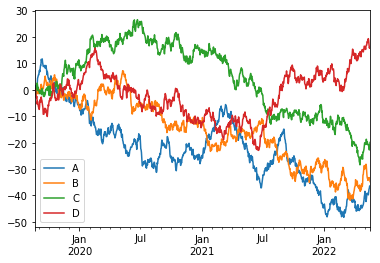

In [94]:
import matplotlib.pyplot as plt
# 在一个DataFrame中,plot方法绘制带有label的所有列.
df12 = pd.DataFrame(np.random.randn(1000,4),index=ts.index,
                   columns=['A','B','C','D'])

df13 = df12.cumsum()
plt.figure()
df13.plot()
plt.legend(loc='best')

In [96]:
### 数据输入/输出
# 写入csv文件
df13.to_csv('./best.csv')
# 从csv文件读数据
pd.read_csv('./best.csv')

,Unnamed: 0,A,B,C,D
0,2019-08-22,0.086278,-0.285369,-0.012890,0.452216
1,2019-08-23,1.412777,0.238720,-1.740038,-0.123636
2,2019-08-24,0.799518,-0.888554,-0.924861,-1.706895
3,2019-08-25,1.564615,-1.646619,0.184296,-2.976331
4,2019-08-26,1.903628,-1.025881,1.386930,-2.719044
5,2019-08-27,1.164920,-0.724013,1.236690,-2.495277
6,2019-08-28,2.003877,0.348358,2.549467,-5.438851
7,2019-08-29,4.304125,-0.459755,1.763327,-4.409135
8,2019-08-30,4.726267,-1.517907,-0.212574,-5.101913
9,2019-08-31,5.277158,-1.264182,0.906538,-5.894793


In [102]:
### HDF5
# pip install tables
# 写入HDF5
df13.to_hdf('./best.h5','df')
# 从HDF5读数据
pd.read_hdf('./best.h5','df')

,A,B,C,D
2019-08-22,0.086278,-0.285369,-0.012890,0.452216
2019-08-23,1.412777,0.238720,-1.740038,-0.123636
2019-08-24,0.799518,-0.888554,-0.924861,-1.706895
2019-08-25,1.564615,-1.646619,0.184296,-2.976331
2019-08-26,1.903628,-1.025881,1.386930,-2.719044
2019-08-27,1.164920,-0.724013,1.236690,-2.495277
2019-08-28,2.003877,0.348358,2.549467,-5.438851
2019-08-29,4.304125,-0.459755,1.763327,-4.409135
2019-08-30,4.726267,-1.517907,-0.212574,-5.101913
2019-08-31,5.277158,-1.264182,0.906538,-5.894793


In [103]:
### Excel
# 写入excel文件
df13.to_excel('./best.xlsx',sheet_name='best')
# 从excel文件读取数据
pd.read_excel('./best.xlsx','best',index_col=None,na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2019-08-22,0.086278,-0.285369,-0.012890,0.452216
1,2019-08-23,1.412777,0.238720,-1.740038,-0.123636
2,2019-08-24,0.799518,-0.888554,-0.924861,-1.706895
3,2019-08-25,1.564615,-1.646619,0.184296,-2.976331
4,2019-08-26,1.903628,-1.025881,1.386930,-2.719044
5,2019-08-27,1.164920,-0.724013,1.236690,-2.495277
6,2019-08-28,2.003877,0.348358,2.549467,-5.438851
7,2019-08-29,4.304125,-0.459755,1.763327,-4.409135
8,2019-08-30,4.726267,-1.517907,-0.212574,-5.101913
9,2019-08-31,5.277158,-1.264182,0.906538,-5.894793


In [104]:
# Gotchas 坑
# 异常
if pd.Series([False,True,False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().